# Import Relevant Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import Raw Data and Find Vinyl Peak

In [2]:
# Import raw data
df = pd.read_csv('t0_1.txt', delimiter = '\t') # Tab delimited.
df = df.drop(df.columns[0:3], axis=1) # Drop 1st 3 columns.
df

,99.358093,103.869308,108.378343,112.883076,117.385634,121.886020,126.382113,130.873918,135.367798,139.855275,...,2470.019140,2473.183625,2476.346881,2479.507290,2482.668093,2485.827668,2488.984401,2492.141526,2495.295811,2498.445642
0,595.0,755.0,880.0,906.0,967.0,1028.0,1074.0,1201.0,1240.0,1342.0,...,1711.0,1746.0,1670.0,1778.0,1656.0,1754.0,1759.0,1722.0,1626.0,1823.0
1,536.0,675.0,794.0,859.0,908.0,914.0,958.0,1097.0,1039.0,1136.0,...,1625.0,1734.0,1682.0,1696.0,1679.0,1635.0,1616.0,1779.0,1755.0,1662.0
2,474.0,642.0,747.0,754.0,899.0,963.0,1024.0,1023.0,1010.0,1213.0,...,1676.0,1738.0,1696.0,1806.0,1722.0,1774.0,1692.0,1800.0,1820.0,1745.0
3,479.0,613.0,764.0,790.0,851.0,942.0,961.0,1012.0,1048.0,1148.0,...,1739.0,1666.0,1587.0,1737.0,1651.0,1800.0,1639.0,1766.0,1817.0,1836.0
4,511.0,579.0,776.0,892.0,816.0,955.0,975.0,988.0,1068.0,1114.0,...,1791.0,1673.0,1668.0,1803.0,1720.0,1763.0,1586.0,1752.0,1782.0,1862.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,421.0,479.0,592.0,651.0,675.0,711.0,795.0,778.0,831.0,966.0,...,726.0,840.0,683.0,796.0,782.0,803.0,795.0,792.0,826.0,849.0
347,447.0,536.0,613.0,658.0,729.0,660.0,758.0,761.0,791.0,911.0,...,828.0,836.0,768.0,817.0,748.0,782.0,796.0,846.0,779.0,802.0
348,389.0,480.0,614.0,636.0,718.0,716.0,702.0,821.0,855.0,809.0,...,903.0,898.0,853.0,886.0,877.0,971.0,835.0,856.0,820.0,912.0
349,454.0,570.0,589.0,706.0,649.0,732.0,781.0,878.0,818.0,952.0,...,902.0,910.0,790.0,894.0,816.0,830.0,839.0,886.0,888.0,907.0


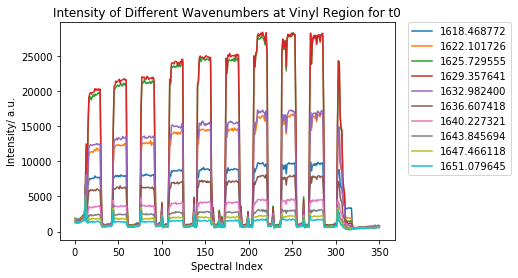

In [3]:
# Find out Vinyl Peak Wavenumber = ~1630 cm-1 Region

df.iloc[:, 375:385].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity/ a.u.')
plt.title('Intensity of Different Wavenumbers at Vinyl Region for t0')
plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
plt.show() 
# Plot all columns in the region to see which intensity is the highest. Pick that index location.
# The vinyl peak is the wavenumber with the highest intensity.

In [4]:
# df.loc[:,'1629.357641'] --> When using loc.
df.columns.get_loc('1629.357641') #--> Use the get_loc command on the column index to find the index location. 
# df.iloc[:,378] --> When using iloc

# Column index 378 is equivalent to column label '1629.357641'. Use relevant parameter for iloc and loc respectively.

378

# Filter Relevant Spectra

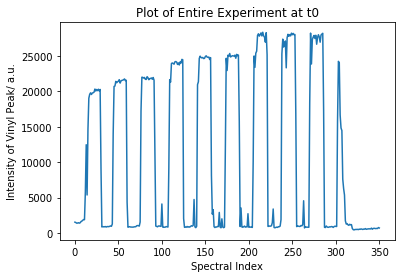

In [5]:
# Plot Vinyl Peak Wavenumber Column out.
df.loc[:,'1629.357641'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Plot of Entire Experiment at t0')
plt.show()

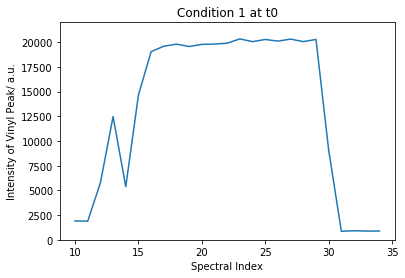

In [6]:
# Condition 
condition1 = df.iloc[10:35,:] 
condition1.loc[:,'1629.357641'].plot() # Plot the spectra out
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 1 at t0')
plt.ylim(0,22000) # Zoom in to relevant spectral range.
plt.show()

In [7]:
# Filter out relevant data to be stored and used for AUC analysis.

condition1_ss = condition1.loc[20:24, :]
condition1_ss.insert(loc = 0, column = 'Condition', value =10)
condition1_ss

,Condition,99.358093,103.869308,108.378343,112.883076,117.385634,121.886020,126.382113,130.873918,135.367798,...,2470.019140,2473.183625,2476.346881,2479.507290,2482.668093,2485.827668,2488.984401,2492.141526,2495.295811,2498.445642
20,10,10609.0,12211.0,12483.0,12010.0,11226.0,10228.0,9298.0,8603.0,8000.0,...,221.0,266.0,179.0,302.0,205.0,242.0,247.0,263.0,170.0,232.0
21,10,10614.0,12161.0,12378.0,12066.0,11130.0,10024.0,9161.0,8578.0,7988.0,...,220.0,274.0,189.0,290.0,251.0,271.0,197.0,270.0,176.0,305.0
22,10,10736.0,11867.0,12328.0,12076.0,11144.0,10205.0,9301.0,8401.0,8218.0,...,238.0,238.0,190.0,287.0,203.0,252.0,184.0,210.0,213.0,268.0
23,10,10545.0,12028.0,12616.0,11967.0,11369.0,10304.0,9341.0,8738.0,8125.0,...,223.0,280.0,230.0,268.0,273.0,245.0,171.0,239.0,197.0,202.0
24,10,10646.0,11982.0,12571.0,12097.0,11296.0,10168.0,9295.0,8703.0,8163.0,...,187.0,226.0,174.0,264.0,201.0,281.0,155.0,288.0,181.0,264.0


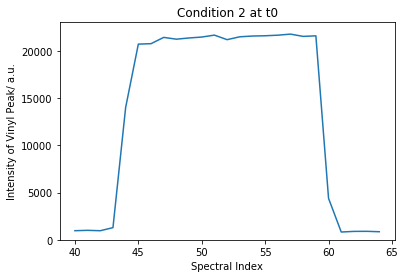

In [8]:
# condition 
condition2 = df.iloc[40:65,:] 
condition2.loc[:,'1629.357641'].plot() # Plot the spectra out
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 2 at t0')
plt.ylim(0,23000) # Zoom in to relevant spectral range.
plt.show()

In [9]:
# Filter out relevant data to be stored and used for AUC analysis.

condition2_ss = condition2.loc[50:54, :]
condition2_ss.insert(loc = 0, column = 'Condition', value =11)
condition2_ss

,Condition,99.358093,103.869308,108.378343,112.883076,117.385634,121.886020,126.382113,130.873918,135.367798,...,2470.019140,2473.183625,2476.346881,2479.507290,2482.668093,2485.827668,2488.984401,2492.141526,2495.295811,2498.445642
50,11,11039.0,11966.0,12588.0,12375.0,11598.0,10531.0,9682.0,8772.0,8371.0,...,133.0,184.0,103.0,209.0,139.0,156.0,181.0,255.0,192.0,167.0
51,11,11086.0,12465.0,12556.0,12298.0,11462.0,10735.0,9556.0,9014.0,8217.0,...,201.0,215.0,139.0,222.0,191.0,131.0,155.0,142.0,175.0,206.0
52,11,11080.0,12233.0,12655.0,12432.0,11393.0,10583.0,9569.0,8846.0,8593.0,...,178.0,190.0,166.0,211.0,184.0,154.0,143.0,200.0,186.0,197.0
53,11,10850.0,12350.0,12786.0,12165.0,11193.0,10543.0,9469.0,8923.0,8297.0,...,144.0,180.0,134.0,199.0,121.0,180.0,108.0,145.0,170.0,181.0
54,11,10997.0,12565.0,12756.0,12282.0,11227.0,10401.0,9487.0,8886.0,8336.0,...,167.0,195.0,170.0,249.0,162.0,200.0,140.0,209.0,169.0,163.0


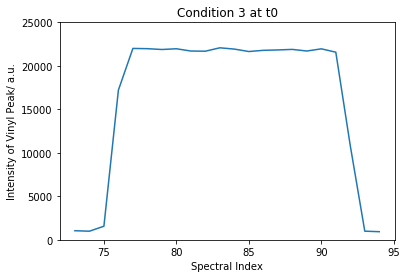

In [10]:
# Condition
condition3 = df.iloc[73:95,:] 
condition3.loc[:,'1629.357641'].plot() # Plot the spectra out
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 3 at t0')
plt.ylim(0,25000) # Zoom in to relevant spectral range.
plt.show()

In [11]:
# Filter out relevant data to be stored and used for AUC analysis.

condition3_ss = condition3.loc[85:89, :]
condition3_ss.insert(loc = 0, column = 'Condition', value =12)
condition3_ss

,Condition,99.358093,103.869308,108.378343,112.883076,117.385634,121.886020,126.382113,130.873918,135.367798,...,2470.019140,2473.183625,2476.346881,2479.507290,2482.668093,2485.827668,2488.984401,2492.141526,2495.295811,2498.445642
85,12,11311.0,12203.0,13061.0,12590.0,11670.0,10595.0,10076.0,8942.0,8498.0,...,187.0,168.0,189.0,198.0,229.0,141.0,165.0,180.0,188.0,236.0
86,12,11095.0,12481.0,12916.0,12331.0,11405.0,10596.0,9697.0,8792.0,8246.0,...,161.0,248.0,131.0,176.0,104.0,191.0,106.0,190.0,97.0,176.0
87,12,11251.0,12418.0,12844.0,12354.0,11646.0,10511.0,9745.0,8791.0,8369.0,...,191.0,162.0,163.0,200.0,191.0,191.0,115.0,191.0,148.0,185.0
88,12,11030.0,12659.0,13077.0,12557.0,11542.0,10490.0,9519.0,9031.0,8589.0,...,171.0,167.0,151.0,209.0,194.0,208.0,151.0,192.0,153.0,200.0
89,12,10996.0,12607.0,12503.0,12190.0,11589.0,10534.0,9616.0,9034.0,8302.0,...,240.0,221.0,105.0,239.0,171.0,140.0,169.0,181.0,155.0,182.0


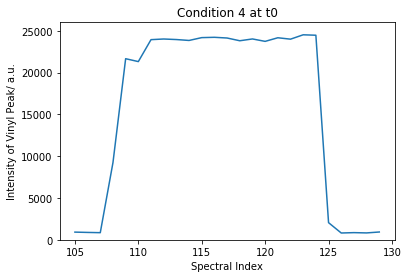

In [12]:
# Condition
condition4 = df.iloc[105:130,:] 
condition4.loc[:,'1629.357641'].plot() # Plot the spectra out
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 4 at t0')
plt.ylim(0,26000) # Zoom in to relevant spectral range.
plt.show()

In [13]:
# Filter out relevant data to be stored and used for AUC analysis.

condition4_ss = condition4.loc[117:121, :]
condition4_ss.insert(loc = 0, column = 'Condition', value =13)
condition4_ss

,Condition,99.358093,103.869308,108.378343,112.883076,117.385634,121.886020,126.382113,130.873918,135.367798,...,2470.019140,2473.183625,2476.346881,2479.507290,2482.668093,2485.827668,2488.984401,2492.141526,2495.295811,2498.445642
117,13,11533.0,12822.0,13810.0,13176.0,12290.0,11206.0,10268.0,9257.0,8809.0,...,161.0,200.0,105.0,234.0,153.0,196.0,133.0,160.0,120.0,184.0
118,13,11420.0,13090.0,13308.0,13254.0,12025.0,11293.0,10259.0,9593.0,8782.0,...,140.0,235.0,164.0,178.0,106.0,175.0,104.0,175.0,122.0,148.0
119,13,11506.0,13074.0,13182.0,13232.0,12279.0,11221.0,10246.0,9527.0,8791.0,...,170.0,216.0,131.0,242.0,159.0,135.0,157.0,180.0,148.0,202.0
120,13,11772.0,13147.0,13584.0,13150.0,12127.0,11180.0,10310.0,9312.0,8948.0,...,162.0,147.0,138.0,140.0,127.0,179.0,148.0,185.0,79.0,125.0
121,13,11663.0,13163.0,13607.0,12889.0,12126.0,11078.0,10361.0,9450.0,8746.0,...,180.0,195.0,181.0,186.0,177.0,130.0,127.0,169.0,211.0,199.0


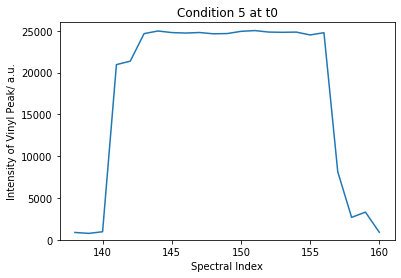

In [14]:
# Condition
condition5 = df.iloc[138:161,:] 
condition5.loc[:,'1629.357641'].plot() # Plot the spectra out
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 5 at t0')
plt.ylim(0,26000) # Zoom in to relevant spectral range.
plt.show()

In [15]:
# Filter out relevant data to be stored and used for AUC analysis.

condition5_ss = condition5.loc[150:154, :]
condition5_ss.insert(loc = 0, column = 'Condition', value =14)
condition5_ss

,Condition,99.358093,103.869308,108.378343,112.883076,117.385634,121.886020,126.382113,130.873918,135.367798,...,2470.019140,2473.183625,2476.346881,2479.507290,2482.668093,2485.827668,2488.984401,2492.141526,2495.295811,2498.445642
150,14,11708.0,13077.0,13735.0,13380.0,12381.0,11338.0,10526.0,9768.0,8974.0,...,190.0,198.0,150.0,176.0,135.0,159.0,128.0,245.0,108.0,130.0
151,14,11586.0,13324.0,13554.0,13223.0,12237.0,11324.0,10370.0,9492.0,8834.0,...,142.0,138.0,104.0,220.0,150.0,188.0,135.0,175.0,156.0,148.0
152,14,11746.0,13435.0,13463.0,13296.0,12294.0,11086.0,10553.0,9633.0,8906.0,...,182.0,175.0,107.0,193.0,132.0,180.0,55.0,209.0,142.0,155.0
153,14,11633.0,13174.0,13834.0,13117.0,12223.0,11308.0,10445.0,9718.0,9003.0,...,150.0,168.0,118.0,172.0,187.0,146.0,90.0,186.0,147.0,179.0
154,14,11751.0,13318.0,13803.0,13306.0,12363.0,11419.0,10239.0,9765.0,8941.0,...,184.0,208.0,120.0,160.0,188.0,146.0,156.0,182.0,190.0,166.0


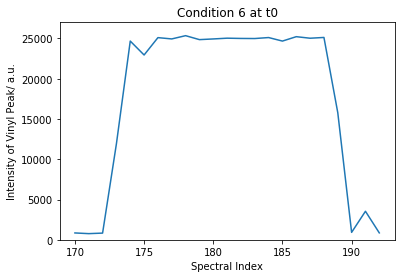

In [16]:
# Condition
condition6 = df.iloc[170:193,:] 
condition6.loc[:,'1629.357641'].plot() # Plot the spectra out
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 6 at t0')
plt.ylim(0,27000) # Zoom in to relevant spectral range.
plt.show()

In [17]:
# Filter out relevant data to be stored and used for AUC analysis.

condition6_ss = condition6.loc[180:184, :]
condition6_ss.insert(loc = 0, column = 'Condition', value =15)
condition6_ss

,Condition,99.358093,103.869308,108.378343,112.883076,117.385634,121.886020,126.382113,130.873918,135.367798,...,2470.019140,2473.183625,2476.346881,2479.507290,2482.668093,2485.827668,2488.984401,2492.141526,2495.295811,2498.445642
180,15,11634.0,13213.0,13746.0,13174.0,12301.0,11401.0,10467.0,9813.0,9078.0,...,168.0,209.0,151.0,234.0,152.0,172.0,111.0,177.0,160.0,188.0
181,15,11770.0,13254.0,13907.0,13486.0,12316.0,11398.0,10326.0,9801.0,8916.0,...,178.0,167.0,168.0,188.0,183.0,146.0,116.0,175.0,171.0,119.0
182,15,11868.0,13237.0,13472.0,13403.0,12196.0,11336.0,10533.0,9490.0,9125.0,...,122.0,186.0,147.0,228.0,127.0,189.0,98.0,205.0,141.0,149.0
183,15,11662.0,13162.0,13938.0,13174.0,12443.0,11516.0,10528.0,9592.0,9087.0,...,150.0,170.0,110.0,222.0,123.0,144.0,150.0,156.0,135.0,172.0
184,15,11738.0,13095.0,13595.0,13414.0,12446.0,11595.0,10420.0,9628.0,9132.0,...,135.0,146.0,136.0,124.0,126.0,158.0,141.0,210.0,117.0,187.0


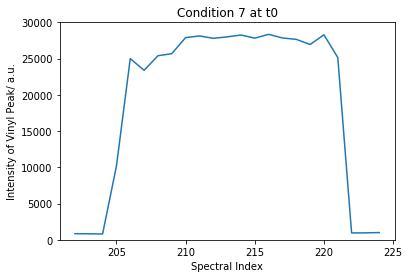

In [18]:
# Condition
condition7 = df.iloc[202:225,:] 
condition7.loc[:,'1629.357641'].plot() # Plot the spectra out
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 7 at t0')
plt.ylim(0,30000) # Zoom in to relevant spectral range.
plt.show()

In [19]:
# Filter out relevant data to be stored and used for AUC analysis.

condition7_ss = condition7.loc[214:218, :]
condition7_ss.insert(loc = 0, column = 'Condition', value =16)
condition7_ss

,Condition,99.358093,103.869308,108.378343,112.883076,117.385634,121.886020,126.382113,130.873918,135.367798,...,2470.019140,2473.183625,2476.346881,2479.507290,2482.668093,2485.827668,2488.984401,2492.141526,2495.295811,2498.445642
214,16,12395.0,14064.0,14590.0,13990.0,13124.0,12119.0,11318.0,10647.0,9481.0,...,186.0,228.0,136.0,177.0,135.0,161.0,94.0,188.0,125.0,173.0
215,16,12367.0,13964.0,14509.0,14022.0,13316.0,12089.0,11159.0,10418.0,9676.0,...,96.0,165.0,168.0,181.0,178.0,172.0,99.0,180.0,140.0,133.0
216,16,12373.0,14011.0,14485.0,13903.0,13162.0,12066.0,11107.0,10146.0,9687.0,...,162.0,187.0,92.0,230.0,142.0,173.0,95.0,186.0,119.0,195.0
217,16,12160.0,13907.0,14531.0,14087.0,13114.0,11896.0,11179.0,10322.0,9898.0,...,152.0,181.0,147.0,185.0,173.0,126.0,132.0,190.0,195.0,129.0
218,16,12147.0,13615.0,13994.0,13817.0,12854.0,11979.0,10820.0,10040.0,9449.0,...,170.0,129.0,204.0,244.0,157.0,194.0,139.0,243.0,139.0,196.0


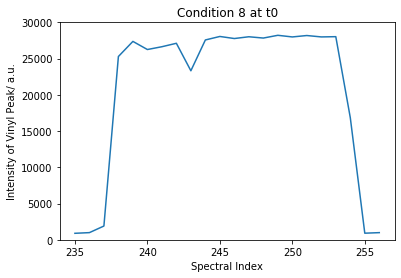

In [20]:
# Condition
condition8 = df.iloc[235:257,:] 
condition8.loc[:,'1629.357641'].plot() # Plot the spectra out
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 8 at t0')
plt.ylim(0,30000) # Zoom in to relevant spectral range.
plt.show()

In [21]:
# Filter out relevant data to be stored and used for AUC analysis.

condition8_ss = condition8.loc[248:252, :]
condition8_ss.insert(loc = 0, column = 'Condition', value =17)
condition8_ss

,Condition,99.358093,103.869308,108.378343,112.883076,117.385634,121.886020,126.382113,130.873918,135.367798,...,2470.019140,2473.183625,2476.346881,2479.507290,2482.668093,2485.827668,2488.984401,2492.141526,2495.295811,2498.445642
248,17,12313.0,13879.0,14273.0,13814.0,13044.0,12121.0,10960.0,10111.0,9592.0,...,161.0,132.0,100.0,195.0,145.0,115.0,62.0,117.0,130.0,143.0
249,17,12252.0,13670.0,14432.0,13893.0,13090.0,12208.0,11039.0,10468.0,9565.0,...,132.0,222.0,119.0,157.0,121.0,176.0,95.0,179.0,193.0,162.0
250,17,12452.0,13618.0,14413.0,13795.0,13187.0,11945.0,11197.0,10309.0,9500.0,...,161.0,183.0,78.0,153.0,85.0,103.0,100.0,184.0,139.0,147.0
251,17,12203.0,13909.0,14283.0,13897.0,13289.0,12215.0,11029.0,10111.0,9822.0,...,174.0,129.0,176.0,205.0,117.0,171.0,97.0,134.0,116.0,118.0
252,17,12396.0,14085.0,14253.0,13796.0,13253.0,12217.0,11053.0,10283.0,9495.0,...,187.0,215.0,94.0,199.0,133.0,164.0,126.0,158.0,131.0,193.0


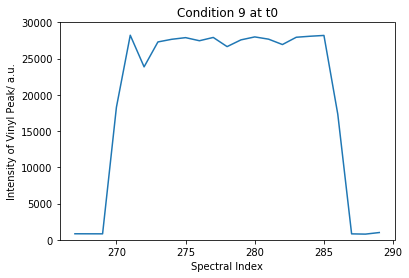

In [22]:
# Condition
condition9 = df.iloc[267:290,:] 
condition9.loc[:,'1629.357641'].plot() # Plot the spectra out
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 9 at t0')
plt.ylim(0,30000) # Zoom in to relevant spectral range.
plt.show()

In [23]:
# Filter out relevant data to be stored and used for AUC analysis.

condition9_ss = condition9.loc[280:284, :]
condition9_ss.insert(loc = 0, column = 'Condition', value =18)
condition9_ss

,Condition,99.358093,103.869308,108.378343,112.883076,117.385634,121.886020,126.382113,130.873918,135.367798,...,2470.019140,2473.183625,2476.346881,2479.507290,2482.668093,2485.827668,2488.984401,2492.141526,2495.295811,2498.445642
280,18,12265.0,13915.0,14303.0,13979.0,13251.0,12255.0,11183.0,10344.0,9906.0,...,152.0,158.0,125.0,196.0,135.0,146.0,117.0,137.0,134.0,158.0
281,18,12206.0,13781.0,14372.0,13903.0,13051.0,12119.0,11180.0,10244.0,9801.0,...,152.0,154.0,90.0,147.0,130.0,162.0,100.0,163.0,117.0,157.0
282,18,11834.0,13842.0,13760.0,13555.0,12588.0,11739.0,10952.0,9986.0,9333.0,...,213.0,233.0,209.0,237.0,182.0,231.0,110.0,209.0,174.0,203.0
283,18,12256.0,13959.0,14475.0,13939.0,12928.0,11934.0,11170.0,10293.0,9602.0,...,150.0,98.0,169.0,174.0,172.0,157.0,119.0,146.0,164.0,152.0
284,18,12431.0,14177.0,14593.0,14278.0,12931.0,12236.0,11147.0,10503.0,9610.0,...,156.0,158.0,88.0,186.0,154.0,161.0,88.0,139.0,118.0,180.0


In [24]:
df_ = pd.concat([condition1_ss, condition2_ss, condition3_ss, condition4_ss, condition5_ss, condition6_ss, condition7_ss,
                 condition8_ss, condition9_ss])
# Concatenate all relevant slug dataframes.

df_

,Condition,99.358093,103.869308,108.378343,112.883076,117.385634,121.886020,126.382113,130.873918,135.367798,...,2470.019140,2473.183625,2476.346881,2479.507290,2482.668093,2485.827668,2488.984401,2492.141526,2495.295811,2498.445642
20,10,10609.0,12211.0,12483.0,12010.0,11226.0,10228.0,9298.0,8603.0,8000.0,...,221.0,266.0,179.0,302.0,205.0,242.0,247.0,263.0,170.0,232.0
21,10,10614.0,12161.0,12378.0,12066.0,11130.0,10024.0,9161.0,8578.0,7988.0,...,220.0,274.0,189.0,290.0,251.0,271.0,197.0,270.0,176.0,305.0
22,10,10736.0,11867.0,12328.0,12076.0,11144.0,10205.0,9301.0,8401.0,8218.0,...,238.0,238.0,190.0,287.0,203.0,252.0,184.0,210.0,213.0,268.0
23,10,10545.0,12028.0,12616.0,11967.0,11369.0,10304.0,9341.0,8738.0,8125.0,...,223.0,280.0,230.0,268.0,273.0,245.0,171.0,239.0,197.0,202.0
24,10,10646.0,11982.0,12571.0,12097.0,11296.0,10168.0,9295.0,8703.0,8163.0,...,187.0,226.0,174.0,264.0,201.0,281.0,155.0,288.0,181.0,264.0
50,11,11039.0,11966.0,12588.0,12375.0,11598.0,10531.0,9682.0,8772.0,8371.0,...,133.0,184.0,103.0,209.0,139.0,156.0,181.0,255.0,192.0,167.0
51,11,11086.0,12465.0,12556.0,12298.0,11462.0,10735.0,9556.0,9014.0,8217.0,...,201.0,215.0,139.0,222.0,191.0,131.0,155.0,142.0,175.0,206.0
52,11,11080.0,12233.0,12655.0,12432.0,11393.0,10583.0,9569.0,8846.0,8593.0,...,178.0,190.0,166.0,211.0,184.0,154.0,143.0,200.0,186.0,197.0
53,11,10850.0,12350.0,12786.0,12165.0,11193.0,10543.0,9469.0,8923.0,8297.0,...,144.0,180.0,134.0,199.0,121.0,180.0,108.0,145.0,170.0,181.0
54,11,10997.0,12565.0,12756.0,12282.0,11227.0,10401.0,9487.0,8886.0,8336.0,...,167.0,195.0,170.0,249.0,162.0,200.0,140.0,209.0,169.0,163.0


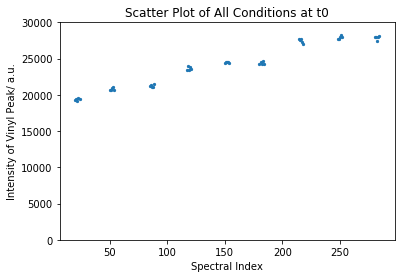

In [25]:
x = df_.index # Extract row indices (spectral index).
y = df_.iloc[:,378] # Extract intensity of vinyl peak.
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Scatter Plot of All Conditions at t0')
plt.ylim(0, 30000)

plt.scatter(x,y, s = 5) # Render a scatter plot between x and y, with size of dots = 5.
plt.show()

# Verify Manual Labeling Accuracy

In [26]:
df_['Condition'] = df_['Condition'].astype('category')
df_['Condition'].nunique()
# Verify number of unique categories. This must correspond with the number of conditions.

9

In [27]:
# Inspect df_.
df_

,Condition,99.358093,103.869308,108.378343,112.883076,117.385634,121.886020,126.382113,130.873918,135.367798,...,2470.019140,2473.183625,2476.346881,2479.507290,2482.668093,2485.827668,2488.984401,2492.141526,2495.295811,2498.445642
20,10,10609.0,12211.0,12483.0,12010.0,11226.0,10228.0,9298.0,8603.0,8000.0,...,221.0,266.0,179.0,302.0,205.0,242.0,247.0,263.0,170.0,232.0
21,10,10614.0,12161.0,12378.0,12066.0,11130.0,10024.0,9161.0,8578.0,7988.0,...,220.0,274.0,189.0,290.0,251.0,271.0,197.0,270.0,176.0,305.0
22,10,10736.0,11867.0,12328.0,12076.0,11144.0,10205.0,9301.0,8401.0,8218.0,...,238.0,238.0,190.0,287.0,203.0,252.0,184.0,210.0,213.0,268.0
23,10,10545.0,12028.0,12616.0,11967.0,11369.0,10304.0,9341.0,8738.0,8125.0,...,223.0,280.0,230.0,268.0,273.0,245.0,171.0,239.0,197.0,202.0
24,10,10646.0,11982.0,12571.0,12097.0,11296.0,10168.0,9295.0,8703.0,8163.0,...,187.0,226.0,174.0,264.0,201.0,281.0,155.0,288.0,181.0,264.0
50,11,11039.0,11966.0,12588.0,12375.0,11598.0,10531.0,9682.0,8772.0,8371.0,...,133.0,184.0,103.0,209.0,139.0,156.0,181.0,255.0,192.0,167.0
51,11,11086.0,12465.0,12556.0,12298.0,11462.0,10735.0,9556.0,9014.0,8217.0,...,201.0,215.0,139.0,222.0,191.0,131.0,155.0,142.0,175.0,206.0
52,11,11080.0,12233.0,12655.0,12432.0,11393.0,10583.0,9569.0,8846.0,8593.0,...,178.0,190.0,166.0,211.0,184.0,154.0,143.0,200.0,186.0,197.0
53,11,10850.0,12350.0,12786.0,12165.0,11193.0,10543.0,9469.0,8923.0,8297.0,...,144.0,180.0,134.0,199.0,121.0,180.0,108.0,145.0,170.0,181.0
54,11,10997.0,12565.0,12756.0,12282.0,11227.0,10401.0,9487.0,8886.0,8336.0,...,167.0,195.0,170.0,249.0,162.0,200.0,140.0,209.0,169.0,163.0


In [28]:
# Generate summary statistics for the vinyl wavenumber.
df_[['Condition', '1629.357641']].groupby('Condition').describe()

1629.357641                                                  \
                count     mean         std      min      25%      50%   
Condition                                                               
10                5.0  19969.0  227.144227  19771.0  19804.0  19893.0   
11                5.0  21458.8  179.726737  21170.0  21447.0  21474.0   
12                5.0  21771.2   97.391991  21646.0  21705.0  21785.0   
13                5.0  23966.2  193.867738  23727.0  23801.0  24016.0   
14                5.0  24885.6   85.333464  24809.0  24837.0  24840.0   
15                5.0  25016.8   63.515352  24941.0  24992.0  25003.0   
16                5.0  27984.4  298.141409  27656.0  27822.0  27846.0   
17                5.0  28042.4  156.303551  27835.0  27989.0  27991.0   
18                5.0  27728.8  465.411861  26941.0  27680.0  27945.0   

                             
               75%      max  
Condition                    
10         20051.0  20326.0  
11         21553.0  21650.0  
12         21829.0  21891.0  
13         24128.0  24159.0  
14         24925.0  25017.0  
15         25035.0  25113.0  
16         28253.0  28345.0  
17         28183.0  28214.0  
18         27993.0  28085.0

In [29]:
# Write extracted dataframe to csv file.
df_.to_csv(r'C:\Users\Tan Jin Da\Desktop\High Throughput Experiments Data\201020 High Throughput Experiment Conditions 10 to 18\Online Raman\df_t0.csv')